In [16]:
df.head()

,Study_Hours,Attendance,Pass_Fail
0,3.745401,51.107976,0
1,9.507143,72.514057,1
2,7.319939,92.376750,0
3,5.986585,83.933493,1
4,1.560186,88.393669,0


In [17]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("../../DataSets/logistic_regression_1000.csv")

df.head()
df.describe()
models = {
    "Linear": SVC(kernel="linear",C=1),
    "Poly" : SVC(kernel="poly",C=1,degree=3),
    "RBF" : SVC(kernel="rbf",gamma=0.1,C=1),
}

X = df.drop("Pass_Fail",axis=1)
Y = df["Pass_Fail"]

X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)
sc = StandardScaler()

X_scal = sc.fit_transform(X_train)
X_scal_test = sc.transform(X_test)

for name, model in models.items():
    model.fit(X_scal,y_train)
    print(f"{name} {model.score(X_scal_test,y_test)}")

input = sc.transform([[9,60]])
print("--------------------------")
for name, model in models.items():
    print(name,*(model.predict(input)))

Linear 0.755
Poly 0.745
RBF 0.785
--------------------------
Linear 1
Poly 1
RBF 1


/Users/hp/ProjectAndCode/DataScience/env/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))

    # Scatter points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30, edgecolors="k")

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid
    xx = np.linspace(xlim[0], xlim[1], 300)
    yy = np.linspace(ylim[0], ylim[1], 300)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # decision function
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary
    ax.contour(XX, YY, Z,
               colors='k',
               levels=[-1, 0, 1],
               alpha=0.7,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=120, linewidth=1, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


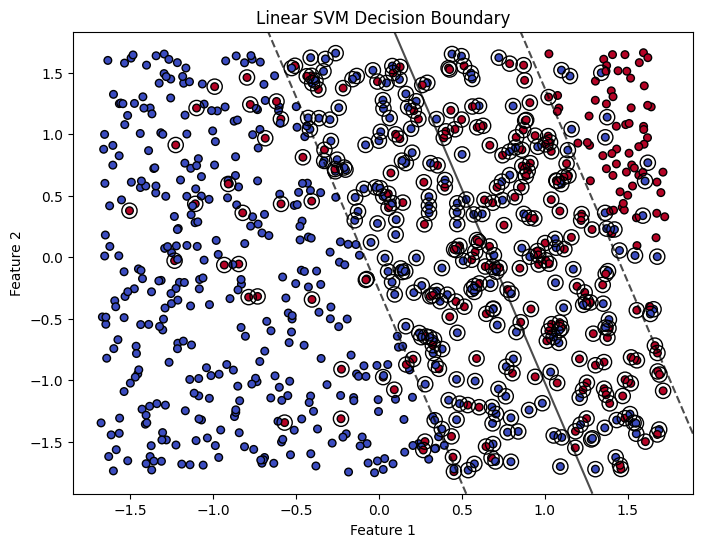

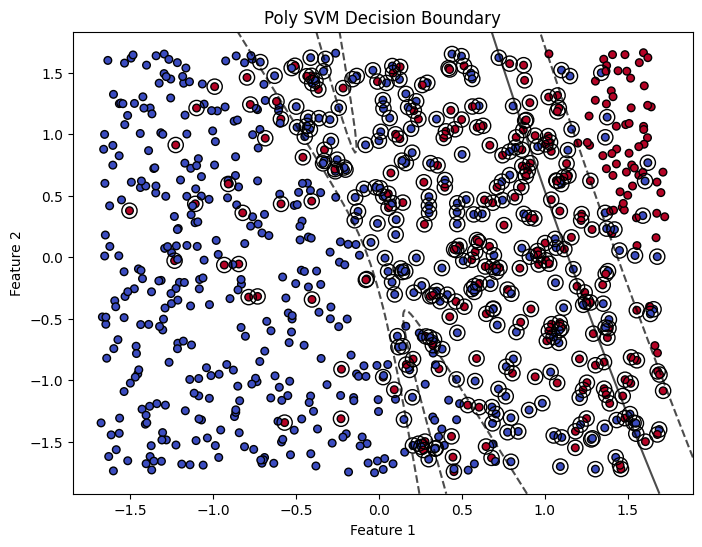

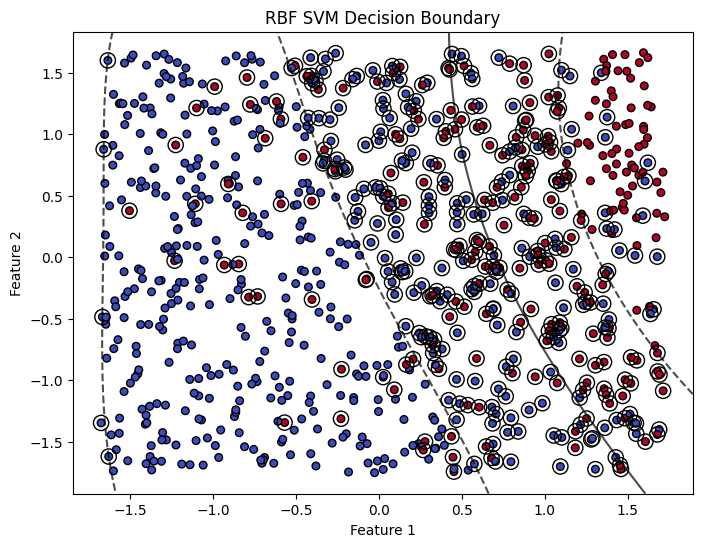

In [19]:
for name, model in models.items():
    plot_decision_boundary(model, X_scal, y_train, f"{name} SVM Decision Boundary")


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup: Define the limits and spacing for our "plot area"
x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0
h = 0.1 # step size of the grid

# Create the 1D coordinate arrays (xx and yy)
# e.g., [-1. , -0.9, ..., 0.9, 1. ]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

print(f"Shape of 1D array xx (before meshgrid): {xx.shape}")
print(f"Shape of 1D array yy (before meshgrid): {yy.shape}")


# 2. The code from your original snippet:
# Create the 2D coordinate matrices
YY, XX = np.meshgrid(yy, xx)

# Flatten and stack them into a list of [x, y] pairs
xy = np.vstack([XX.ravel(), YY.ravel()]).T


# 3. Output and Visualization
print("-" * 30)
print(f"Shape of 2D matrix XX (after meshgrid): {XX.shape}")



Shape of 1D array xx (before meshgrid): (20, 20)
Shape of 1D array yy (before meshgrid): (20, 20)
------------------------------
Shape of 2D matrix XX (after meshgrid): (400, 400)


In [23]:
print(f"Shape of final coordinate array xy: {xy.shape}")


Shape of final coordinate array xy: (160000, 2)


In [24]:
print(f"First 5 coordinate pairs in xy:\n{xy}")


First 5 coordinate pairs in xy:
[[-1.  -1. ]
 [-1.  -1. ]
 [-1.  -1. ]
 ...
 [ 0.9  0.9]
 [ 0.9  0.9]
 [ 0.9  0.9]]
